<h1>Exercise Applied Data Analysis

Using the HR Dataset, answer the following questions

* Which departments are topping the list of employees?
*   What is the distribution of our employees by age band?
* What is the diversity of our employee base by ethnicity and gender?
* What is the average age of employees?
* Which department has the highest and lowest average age?
* What’s the tenure?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hr = pd.read_csv('human_resources.csv')


In [ ]:
(hr['Age']//5*5).map(lambda x: str(x).replace('.0','') + '-' + str(x+4).replace('.0','') )

0        30-34
1        35-39
2        30-34
3        40-44
4        25-29
         ...  
22206    35-39
22207    35-39
22208    50-54
22209    20-24
22210    35-39
Name: Age, Length: 22211, dtype: object

In [ ]:
hr

,Age (bin),Age (bin)1,Birthdate,Complete Name,Department,Employement Status,First Name,Gender,Hire Date,Id,...,% terminated,Age,change hiring number,current year hiring number,hiring down,hiring up,HR,min(-1.0),min(1.0),prior year hiring number
0,30-34,30-35,06/04/1991 00:00:00,Kimmy Walczynski,Engineering,Active,Kimmy,Male,20/01/2002 00:00:00,00-0037846,...,0,31,NaN,NaN,NaN,NaN,1,-1,1,NaN
1,35-39,35-40,29/06/1984 00:00:00,Ignatius Springett,Business Development,Active,Ignatius,Male,04/08/2019 00:00:00,00-0041533,...,0,38,NaN,NaN,NaN,NaN,1,-1,1,NaN
2,30-34,30-35,29/07/1989 00:00:00,Corbie Bittlestone,Sales,Active,Corbie,Male,10/12/2010 00:00:00,00-0045747,...,0,33,NaN,NaN,NaN,NaN,1,-1,1,NaN
3,40-44,40-45,14/09/1982 00:00:00,Baxy Matton,Services,Active,Baxy,Female,04/10/2005 00:00:00,00-0055274,...,0,40,NaN,NaN,NaN,NaN,1,-1,1,NaN
4,25-29,25-30,04/11/1994 00:00:00,Terrell Suff,Product Management,Active,Terrell,Female,29/09/2010 00:00:00,00-0076100,...,0,28,NaN,NaN,NaN,NaN,1,-1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22206,35-39,35-40,04/03/1986 00:00:00,Kaia Meecher,Accounting,Terminated,Kaia,Non-Conforming,15/01/2002 00:00:00,75-8249434,...,1,36,NaN,NaN,NaN,NaN,1,-1,1,NaN
22207,35-39,35-40,08/07/1984 00:00:00,Hyacinthe Pilipets,Accounting,Terminated,Hyacinthe,Non-Conforming,24/08/2001 00:00:00,98-0759640,...,1,38,NaN,NaN,NaN,NaN,1,-1,1,NaN
22208,50-54,50-55,20/01/1968 00:00:00,Teddie Lidgard,Product Management,Active,Teddie,Non-Conforming,27/08/2012 00:00:00,64-0283298,...,0,54,NaN,NaN,NaN,NaN,1,-1,1,NaN
22209,20-24,20-25,28/04/1998 00:00:00,Correy Bulch,Sales,Active,Correy,Non-Conforming,19/06/2018 00:00:00,61-7631824,...,0,24,NaN,NaN,NaN,NaN,1,-1,1,NaN


In [ ]:
hr.columns

Index(['Age (bin)', 'Age (bin)1', 'Birthdate', 'Complete Name', 'Department',
       'Employement Status', 'First Name', 'Gender', 'Hire Date', 'Id',
       'Jobtitle', 'Last Name', 'Location', 'Location City', 'Location State',
       'Race', 'Selected Location', 'Selected Year', 'Status', 'Tenure',
       'Termdate', 'Termdate (group)',
       'Y/Q selection (two step) selected and prior year',
       '% change hiring number', '% terminated', 'Age', 'change hiring number',
       'current year hiring number', 'hiring down', 'hiring up', 'HR',
       'min(-1.0)', 'min(1.0)', 'prior year hiring number'],
      dtype='object')

In [ ]:
hr.groupby('Department')['Id'].count().reset_index().sort_values(by='Id').tail(1)

,Department,Id
3,Engineering,6686


In [ ]:
hr.groupby('Age (bin)')['Id'].count().reset_index()

,Age (bin),Id
0,20-24,2851
1,25-29,2995
2,30-34,3098
3,35-39,3056
4,40-44,2891
5,45-49,2990
6,50-54,3088
7,55-59,1242


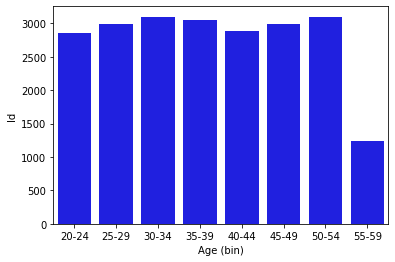

In [ ]:
sns.barplot(data=hr.groupby('Age (bin)')['Id'].count().reset_index(),
             x='Age (bin)',
             y='Id',
            color='blue')

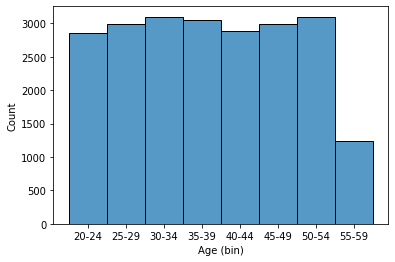

In [ ]:
sns.histplot(data=hr.sort_values(by='Age (bin)'),
             x='Age (bin)')

In [ ]:
hr.groupby(['Race', 'Gender'])['Id'].count()

Race                                       Gender        
American Indian or Alaska Native           Female             634
                                           Male               658
                                           Non-Conforming      35
Asian                                      Female            1690
                                           Male              1785
                                           Non-Conforming      87
Black or African American                  Female            1672
                                           Male              1837
                                           Non-Conforming     109
Hispanic or Latino                         Female            1159
                                           Male              1275
                                           Non-Conforming      67
Native Hawaiian or Other Pacific Islander  Female             548
                                           Male               642
                  

In [ ]:
hr.groupby([ 'Gender', 'Race'])['Id'].count()

Gender          Race                                     
Female          American Indian or Alaska Native              634
                Asian                                        1690
                Black or African American                    1672
                Hispanic or Latino                           1159
                Native Hawaiian or Other Pacific Islander     548
                Two or More Races                            1653
                White                                        2964
Male            American Indian or Alaska Native              658
                Asian                                        1785
                Black or African American                    1837
                Hispanic or Latino                           1275
                Native Hawaiian or Other Pacific Islander     642
                Two or More Races                            1890
                White                                        3199
Non-Conforming  Am

In [ ]:
hr.groupby(['Race', 'Gender'])['Id'].count().reset_index()

,Race,Gender,Id
0,American Indian or Alaska Native,Female,634
1,American Indian or Alaska Native,Male,658
2,American Indian or Alaska Native,Non-Conforming,35
3,Asian,Female,1690
4,Asian,Male,1785
5,Asian,Non-Conforming,87
6,Black or African American,Female,1672
7,Black or African American,Male,1837
8,Black or African American,Non-Conforming,109
9,Hispanic or Latino,Female,1159


Text(0, 0.5, 'Number of Employees')

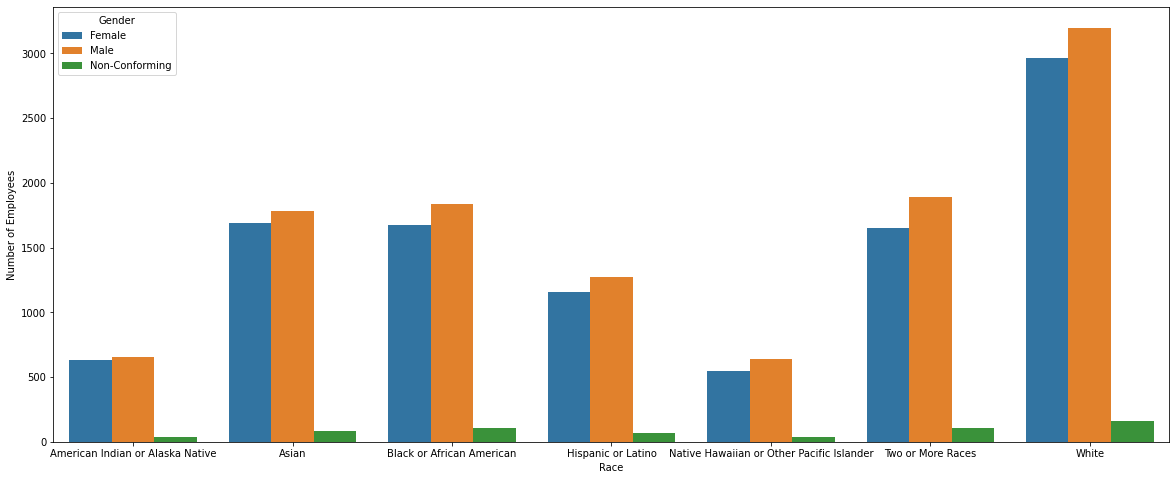

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=hr.groupby(['Race', 'Gender'])['Id'].count().reset_index(),
            x='Race',
            y='Id',
            hue='Gender')
plt.ylabel("Number of Employees")

In [ ]:
hr['Age'].mean()

38.16829498896943

In [ ]:
hr.groupby(['Department'])['Age'].mean().reset_index().sort_values(by='Age').tail(1)

,Department,Age
11,Support,38.535639


In [ ]:
hr.groupby(['Department'])['Age'].mean().reset_index().sort_values(by='Age').head(1)

,Department,Age
6,Marketing,37.663968


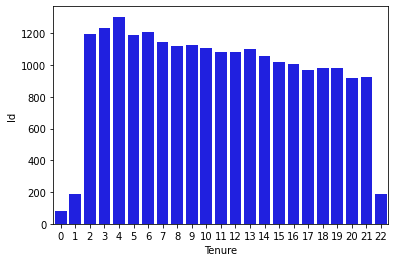

In [ ]:
sns.barplot(data=hr.groupby('Tenure')['Id'].count().reset_index().sort_values('Id'),
            x='Tenure',
            y='Id',
            color='blue')

In [ ]:
hr['Tenure'].value_counts()

4     1304
3     1232
6     1210
2     1195
5     1188
7     1146
9     1128
8     1121
10    1104
13    1102
11    1083
12    1081
14    1056
15    1019
16    1008
18     984
19     982
17     967
21     927
20     918
22     189
1      188
0       79
Name: Tenure, dtype: int64

In [ ]:
hr['Hire Date'].agg(['min','max'])

min    01/01/2001 00:00:00
max    31/12/2019 00:00:00
Name: Hire Date, dtype: object

In [ ]:
hr['% terminated'].value_counts()

0    20011
1     2200
Name: % terminated, dtype: int64

In [ ]:
hr[['Hire Date','Termdate']]

,Hire Date,Termdate
0,20/01/2002 00:00:00,NaN
1,04/08/2019 00:00:00,NaN
2,10/12/2010 00:00:00,NaN
3,04/10/2005 00:00:00,NaN
4,29/09/2010 00:00:00,29/10/2029 06:09:38
...,...,...
22206,15/01/2002 00:00:00,07/02/2014 01:16:38
22207,24/08/2001 00:00:00,03/01/2019 01:28:46
22208,27/08/2012 00:00:00,NaN
22209,19/06/2018 00:00:00,NaN


In [ ]:
hr

,Age (bin),Age (bin)1,Birthdate,Complete Name,Department,Employement Status,First Name,Gender,Hire Date,Id,...,% terminated,Age,change hiring number,current year hiring number,hiring down,hiring up,HR,min(-1.0),min(1.0),prior year hiring number
0,30-34,30-35,06/04/1991 00:00:00,Kimmy Walczynski,Engineering,Active,Kimmy,Male,20/01/2002 00:00:00,00-0037846,...,0,31,NaN,NaN,NaN,NaN,1,-1,1,NaN
1,35-39,35-40,29/06/1984 00:00:00,Ignatius Springett,Business Development,Active,Ignatius,Male,04/08/2019 00:00:00,00-0041533,...,0,38,NaN,NaN,NaN,NaN,1,-1,1,NaN
2,30-34,30-35,29/07/1989 00:00:00,Corbie Bittlestone,Sales,Active,Corbie,Male,10/12/2010 00:00:00,00-0045747,...,0,33,NaN,NaN,NaN,NaN,1,-1,1,NaN
3,40-44,40-45,14/09/1982 00:00:00,Baxy Matton,Services,Active,Baxy,Female,04/10/2005 00:00:00,00-0055274,...,0,40,NaN,NaN,NaN,NaN,1,-1,1,NaN
4,25-29,25-30,04/11/1994 00:00:00,Terrell Suff,Product Management,Active,Terrell,Female,29/09/2010 00:00:00,00-0076100,...,0,28,NaN,NaN,NaN,NaN,1,-1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22206,35-39,35-40,04/03/1986 00:00:00,Kaia Meecher,Accounting,Terminated,Kaia,Non-Conforming,15/01/2002 00:00:00,75-8249434,...,1,36,NaN,NaN,NaN,NaN,1,-1,1,NaN
22207,35-39,35-40,08/07/1984 00:00:00,Hyacinthe Pilipets,Accounting,Terminated,Hyacinthe,Non-Conforming,24/08/2001 00:00:00,98-0759640,...,1,38,NaN,NaN,NaN,NaN,1,-1,1,NaN
22208,50-54,50-55,20/01/1968 00:00:00,Teddie Lidgard,Product Management,Active,Teddie,Non-Conforming,27/08/2012 00:00:00,64-0283298,...,0,54,NaN,NaN,NaN,NaN,1,-1,1,NaN
22209,20-24,20-25,28/04/1998 00:00:00,Correy Bulch,Sales,Active,Correy,Non-Conforming,19/06/2018 00:00:00,61-7631824,...,0,24,NaN,NaN,NaN,NaN,1,-1,1,NaN


In [ ]:
hr['Termdate'].dropna().count() / len(hr['Termdate'])

0.17689433163747692

In [ ]:
hr['Termdate (group)']

0            Active
1            Active
2            Active
3            Active
4        Terminated
            ...    
22206    Terminated
22207    Terminated
22208        Active
22209        Active
22210        Active
Name: Termdate (group), Length: 22211, dtype: object

In [ ]:
hr[hr['Termdate (group)']=='Active']['Termdate'].dropna()

Series([], Name: Termdate, dtype: object)

In [ ]:
hr.groupby('Termdate')['Id'].count().reset_index()

,Termdate,Id
0,01/01/2010 19:07:07,1
1,01/01/2015 06:45:58,1
2,01/01/2016 07:30:24,1
3,01/01/2022 17:03:00,1
4,01/01/2022 23:26:11,1
...,...,...
3924,31/12/2023 13:59:28,1
3925,31/12/2026 18:19:41,1
3926,31/12/2031 13:37:37,1
3927,31/12/2035 22:42:56,1


In [ ]:
hr['Hire Date'] = hr['Hire Date'].map(lambda x: datetime.datetime(int(x.split('/')[2].split(' ')[0]),int(x.split('/')[1]),int(x.split('/')[0])))

In [ ]:
hr['Hire Year'] = hr['Hire Date'].map(lambda x: x.year)
hr['Hire Month'] = hr['Hire Date'].map(lambda x: x.month)

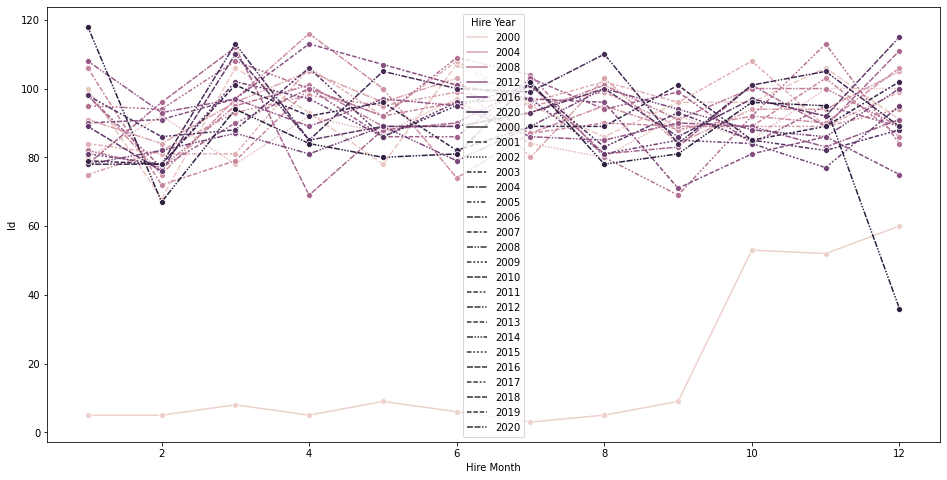

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data = hr.groupby(['Hire Month','Hire Year'])['Id'].count().reset_index(),
             x = 'Hire Month',
             y = 'Id',
             style = 'Hire Year',
             hue = 'Hire Year',
             marker='o')

In [ ]:
from prophet import Prophet

data=hr.groupby('Hire Date')['Id'].count().reset_index().rename(columns={'Hire Date':'ds',
                                                                         'Id':'y'})

m = Prophet()
m.fit(data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr9symw89/usy065x3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr9symw89/kktmyb8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84781', 'data', 'file=/tmp/tmpr9symw89/usy065x3.json', 'init=/tmp/tmpr9symw89/kktmyb8b.json', 'output', 'file=/tmp/tmpr9symw89/prophet_modelph2n5q6o/prophet_model-20221208104914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:49:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
7376,2021-12-09
7377,2021-12-10
7378,2021-12-11
7379,2021-12-12
7380,2021-12-13


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2000-01-11,3.032754,0.987209,5.199495
1,2000-01-12,2.961681,0.859295,4.967031
2,2000-02-11,3.076190,1.071660,5.269443
3,2000-02-12,3.131755,1.114860,5.340501
4,2000-03-11,3.298819,1.212283,5.270927
...,...,...,...,...
7376,2021-12-09,3.202895,1.168940,5.305363
7377,2021-12-10,3.107221,0.892306,5.118162
7378,2021-12-11,3.184581,0.974253,5.173458
7379,2021-12-12,3.161382,1.195073,5.188137


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(m, forecast)

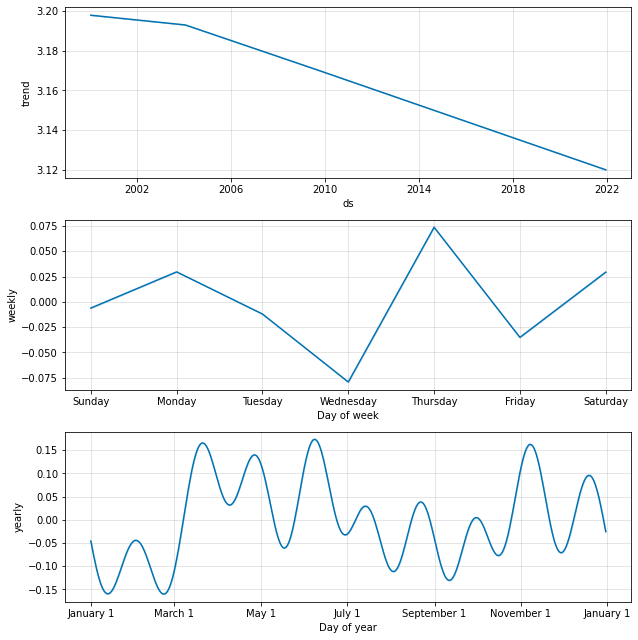

In [ ]:
fig2 = m.plot_components(forecast)